In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import yfinance as yf


In [2]:
ticker_amzn = 'AMZN'
data_amzn = yf.download(ticker_amzn, start='2020-01-01', end='2023-01-01')
data_amzn['Log Returns'] = np.log(data_amzn['Adj Close'] / data_amzn['Adj Close'].shift(1))
data_amzn.dropna(inplace=True)
print(data_amzn.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AMZN       AMZN       AMZN       AMZN   
Date                                                                    
2020-01-03 00:00:00+00:00  93.748497  93.748497  94.309998  93.224998   
2020-01-06 00:00:00+00:00  95.143997  95.143997  95.184502  93.000000   
2020-01-07 00:00:00+00:00  95.343002  95.343002  95.694504  94.601997   
2020-01-08 00:00:00+00:00  94.598503  94.598503  95.550003  94.321999   
2020-01-09 00:00:00+00:00  95.052498  95.052498  95.890999  94.790001   

Price                           Open    Volume Log Returns  
Ticker                          AMZN      AMZN              
Date                                                        
2020-01-03 00:00:00+00:00  93.224998  75288000   -0.012213  
2020-01-06 00:00:00+00:00  93.000000  81236000    0.014776  
2020-01-07 00:00:00+00:00  95.224998  80898000    0.002089  
2020-01-08 00:00:00+00:00  94.902000  70160000   

In [3]:
ticker_msft = 'MSFT'
data_msft = yf.download(ticker_msft, start='2020-01-01', end='2023-01-01')
data_msft['Log Returns'] = np.log(data_msft['Adj Close'] / data_msft['Adj Close'].shift(1))
data_msft.dropna(inplace=True)
print(data_msft.head())


[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           MSFT        MSFT        MSFT        MSFT   
Date                                                                        
2020-01-03 00:00:00+00:00  152.021408  158.619995  159.949997  158.059998   
2020-01-06 00:00:00+00:00  152.414322  159.029999  159.100006  156.509995   
2020-01-07 00:00:00+00:00  151.024689  157.580002  159.669998  157.320007   
2020-01-08 00:00:00+00:00  153.430283  160.089996  160.800003  157.949997   
2020-01-09 00:00:00+00:00  155.347076  162.089996  162.220001  161.029999   

Price                            Open    Volume Log Returns  
Ticker                           MSFT      MSFT              
Date                                                         
2020-01-03 00:00:00+00:00  158.320007  21116200   -0.012530  
2020-01-06 00:00:00+00:00  157.080002  20813700    0.002581  
2020-01-07 00:00:00+00:00  159.320007  21634100   -0.009159  
2020-01-08 

In [4]:
kappa = 2.0  # Speed of mean reversion
theta = 0.02  # Long-term variance
sigma = 0.1  # Volatility of variance
rho = -0.7  # Correlation between asset and variance
v0 = 0.02  # Initial variance
epsilon = 1e-6  # Small positive value to avoid sqrt of zero or negative


In [5]:
def simulate_heston(S0, T, r, kappa, theta, sigma, rho, v0, N=1000, M=100):
    dt = T / N
    S = np.zeros((M, N))
    V = np.zeros((M, N))
    S[:, 0] = S0
    V[:, 0] = v0
    for t in range(1, N):
        Z1 = np.random.normal(size=M)
        Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.normal(size=M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + sigma * np.sqrt(np.maximum(V[:, t-1], epsilon) * dt) * Z1, 0)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * V[:, t-1]) * dt + np.sqrt(np.maximum(V[:, t-1], epsilon) * dt) * Z2)
    return S

S0_amzn = data_amzn['Adj Close'].iloc[-1]
T = 1.0
r = 0.01
S_amzn = simulate_heston(S0_amzn, T, r, kappa, theta, sigma, rho, v0)
print(S_amzn)


[[ 84.          84.28257057  84.75049713 ...  77.64195954  77.72531343
   78.77213447]
 [ 84.          84.56162672  84.23309524 ...  67.25121364  67.77796557
   67.34794066]
 [ 84.          83.95180605  84.12183494 ... 105.68352779 105.25924132
  105.26362713]
 ...
 [ 84.          84.39856904  85.01967566 ...  92.43077896  92.48950757
   92.97346043]
 [ 84.          84.63267064  84.42102106 ...  66.82311851  66.63652367
   66.97317016]
 [ 84.          83.86797538  83.7457246  ...  78.96965682  79.03514601
   79.04948831]]


In [6]:
S0_msft = data_msft['Adj Close'].iloc[-1]
S_msft = simulate_heston(S0_msft, T, r, kappa, theta, sigma, rho, v0)
print(S_msft)


[[236.4201355  237.52581253 236.7623823  ... 287.0961392  287.85058855
  288.64991128]
 [236.4201355  236.59389326 237.88584024 ... 297.26799836 298.14657709
  298.88081286]
 [236.4201355  238.58962217 240.08620779 ... 237.0776533  236.51708564
  236.37093046]
 ...
 [236.4201355  235.80495409 236.75781297 ... 246.81541705 244.52616853
  245.6513374 ]
 [236.4201355  235.1208426  236.30404145 ... 226.01391344 224.70354119
  223.81837776]
 [236.4201355  237.36321177 237.68007882 ... 242.76451559 243.20654801
  243.38026625]]


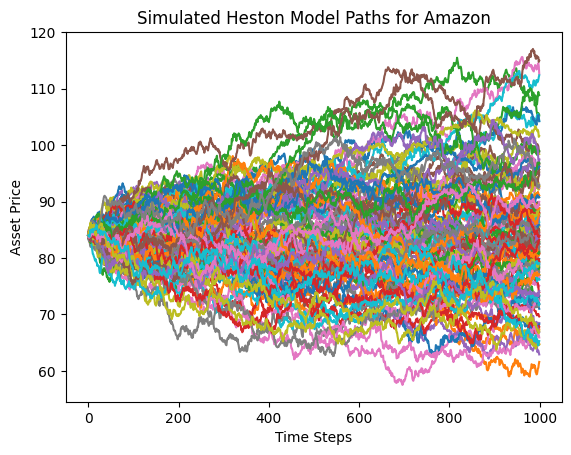

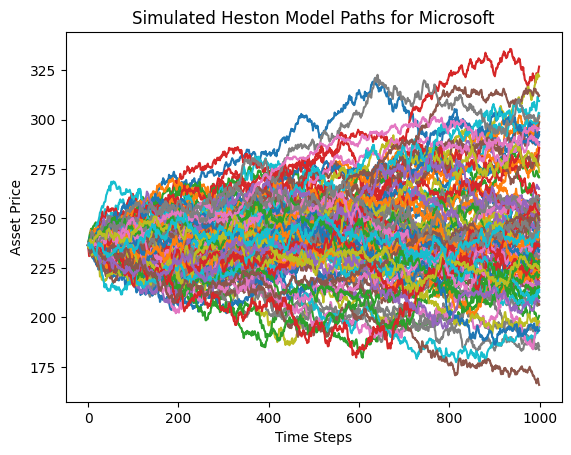

In [7]:
plt.plot(S_amzn.T)
plt.title('Simulated Heston Model Paths for Amazon')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')
plt.show()

plt.plot(S_msft.T)
plt.title('Simulated Heston Model Paths for Microsoft')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')
plt.show()


In [8]:
def local_volatility_surface(data):
    window = 30  # 30-day rolling window
    local_vol = data['Log Returns'].rolling(window=window).std() * np.sqrt(252)  # Annualize the volatility
    local_vol.bfill(inplace=True)  # Backfill to handle NaN values
    return local_vol.values

local_vol_surface_amzn = local_volatility_surface(data_amzn)
local_vol_surface_msft = local_volatility_surface(data_msft)
print(local_vol_surface_amzn)
print(local_vol_surface_msft)


[0.26292203 0.26292203 0.26292203 0.26292203 0.26292203 0.26292203
 0.26292203 0.26292203 0.26292203 0.26292203 0.26292203 0.26292203
 0.26292203 0.26292203 0.26292203 0.26292203 0.26292203 0.26292203
 0.26292203 0.26292203 0.26292203 0.26292203 0.26292203 0.26292203
 0.26292203 0.26292203 0.26292203 0.26292203 0.26292203 0.26292203
 0.25887655 0.25718641 0.25958665 0.2727102  0.30302009 0.30697803
 0.30692157 0.3387624  0.3385298  0.35382    0.36022263 0.37125992
 0.37994019 0.3816662  0.41193329 0.43365918 0.44656118 0.50555666
 0.5400988  0.51582133 0.55831517 0.55496811 0.56227592 0.56363864
 0.56994749 0.56737716 0.57095411 0.58258088 0.58722311 0.59690735
 0.5958501  0.59738997 0.5979926  0.5940645  0.59907457 0.59689689
 0.59840493 0.57908487 0.60220955 0.61051426 0.60465383 0.60842917
 0.60351091 0.60081256 0.58162798 0.56905024 0.55262826 0.47987073
 0.46088482 0.43242742 0.39956219 0.41064076 0.48129458 0.47560949
 0.47102932 0.47005914 0.45835553 0.4502373  0.43783296 0.4393

In [9]:
def simulate_local_vol(S0, T, r, local_vol_surface, N=1000, M=100):
    dt = T / N
    S = np.zeros((M, N))
    S[:, 0] = S0
    for t in range(1, N):
        Z = np.random.normal(size=M)
        vol = local_vol_surface[min(t, len(local_vol_surface) - 1)]  # Ensure index is within bounds
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * vol**2) * dt + vol * np.sqrt(dt) * Z)
    return S

S_local_amzn = simulate_local_vol(S0_amzn, T, r, local_vol_surface_amzn)
print(S_local_amzn)


[[ 84.          83.77128105  83.56360723 ...  46.52258576  46.82904574
   46.87827441]
 [ 84.          83.14427302  84.93007422 ...  86.89809748  87.40348083
   87.98465106]
 [ 84.          84.01999278  82.75078152 ...  80.98998438  81.07502023
   81.49863026]
 ...
 [ 84.          83.0656747   81.76961899 ... 109.83691003 110.76188816
  109.31596926]
 [ 84.          84.1125566   84.566852   ...  68.56575869  68.02088685
   67.6500374 ]
 [ 84.          83.71039611  83.74232027 ... 101.44626617 101.3258105
  100.58432089]]


In [10]:
S_local_msft = simulate_local_vol(S0_msft, T, r, local_vol_surface_msft)
print(S_local_msft)


[[236.4201355  237.19489625 236.50000245 ... 320.9667285  323.57414915
  322.17530621]
 [236.4201355  234.87507127 238.14513271 ... 257.98201929 259.04528215
  260.02583405]
 [236.4201355  238.85044219 239.63160668 ... 154.31412211 155.75495476
  155.22421476]
 ...
 [236.4201355  237.9761393  239.5665187  ... 257.49065053 261.08770713
  262.17620746]
 [236.4201355  235.00809155 232.87887346 ... 162.4479314  160.03796421
  159.99269485]
 [236.4201355  233.67526298 234.60642577 ... 250.02701426 248.8208508
  251.90126664]]


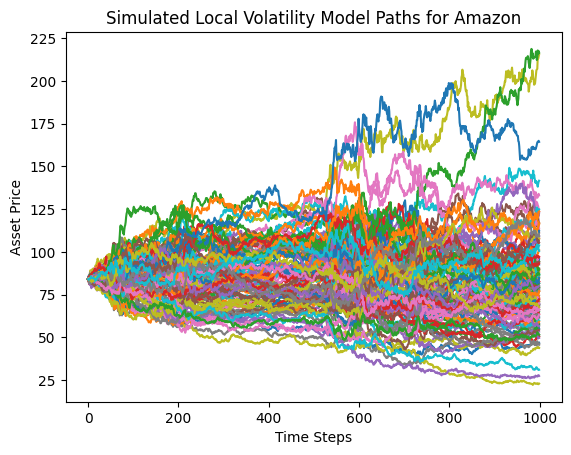

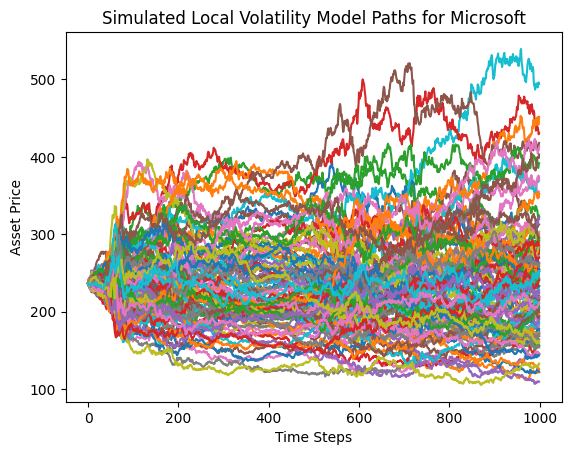

In [11]:
plt.plot(S_local_amzn.T)
plt.title('Simulated Local Volatility Model Paths for Amazon')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')
plt.show()

plt.plot(S_local_msft.T)
plt.title('Simulated Local Volatility Model Paths for Microsoft')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')
plt.show()


In [12]:
def heston_price(params, market_data):
    kappa, theta, sigma, rho, v0 = params
    S0 = market_data['Adj Close'].iloc[-1]
    T = 1.0
    r = 0.01
    simulated_prices = simulate_heston(S0, T, r, kappa, theta, sigma, rho, v0)
    return simulated_prices.mean(axis=0)  # Return the mean price for simplicity

def calibration_objective(params, market_data):
    model_prices = heston_price(params, market_data)
    market_prices = market_data['Adj Close'].values
    mse = np.mean((model_prices - market_prices) ** 2)
    return mse

initial_guess = [kappa, theta, sigma, rho, v0]
result_amzn = minimize(calibration_objective, initial_guess, args=(data_amzn,))
result_msft = minimize(calibration_objective, initial_guess, args=(data_msft,))


In [13]:
calibrated_params_heston_amzn = result_amzn.x
calibrated_params_heston_msft = result_msft.x

print("Calibrated Heston Model Parameters for Amazon:")
print("kappa:", calibrated_params_heston_amzn[0])
print("theta:", calibrated_params_heston_amzn[1])
print("sigma:", calibrated_params_heston_amzn[2])
print("rho:", calibrated_params_heston_amzn[3])
print("v0:", calibrated_params_heston_amzn[4])

print("\nCalibrated Heston Model Parameters for Microsoft:")
print("kappa:", calibrated_params_heston_msft[0])
print("theta:", calibrated_params_heston_msft[1])
print("sigma:", calibrated_params_heston_msft[2])
print("rho:", calibrated_params_heston_msft[3])
print("v0:", calibrated_params_heston_msft[4])


Calibrated Heston Model Parameters for Amazon:
kappa: 2.0000051686874043
theta: 0.020009460311989025
sigma: 0.1000062773799793
rho: -0.6999870874173586
v0: 0.020002045281318666

Calibrated Heston Model Parameters for Microsoft:
kappa: 1.9999911569418989
theta: 0.019981241532657495
sigma: 0.10000579073344708
rho: -0.6999945327679667
v0: 0.019994407325496788


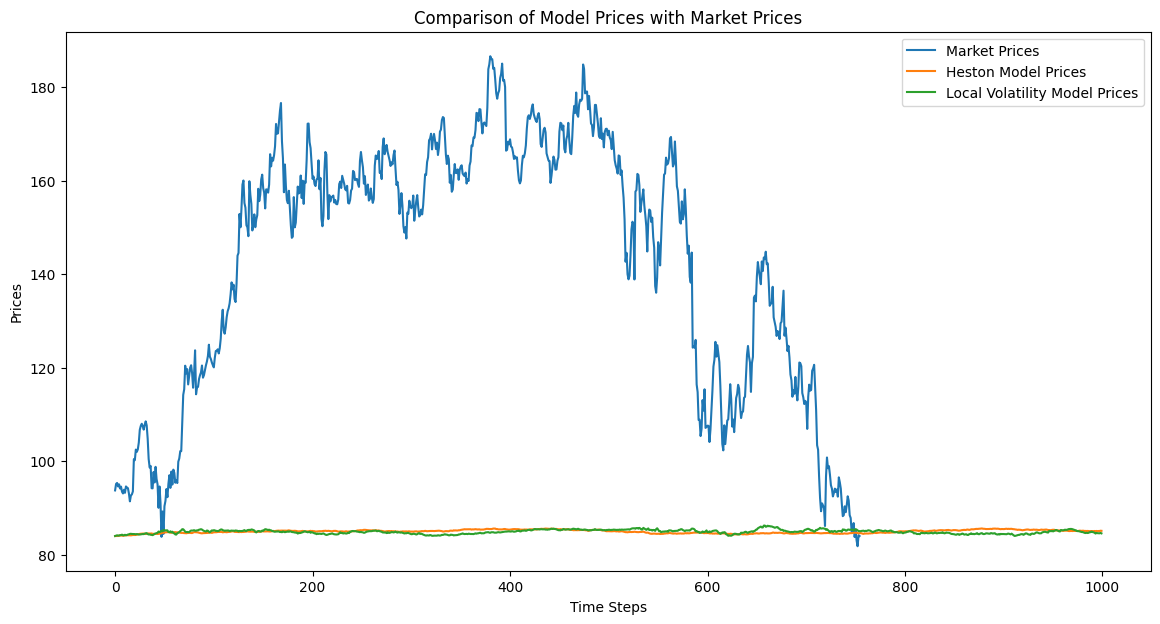

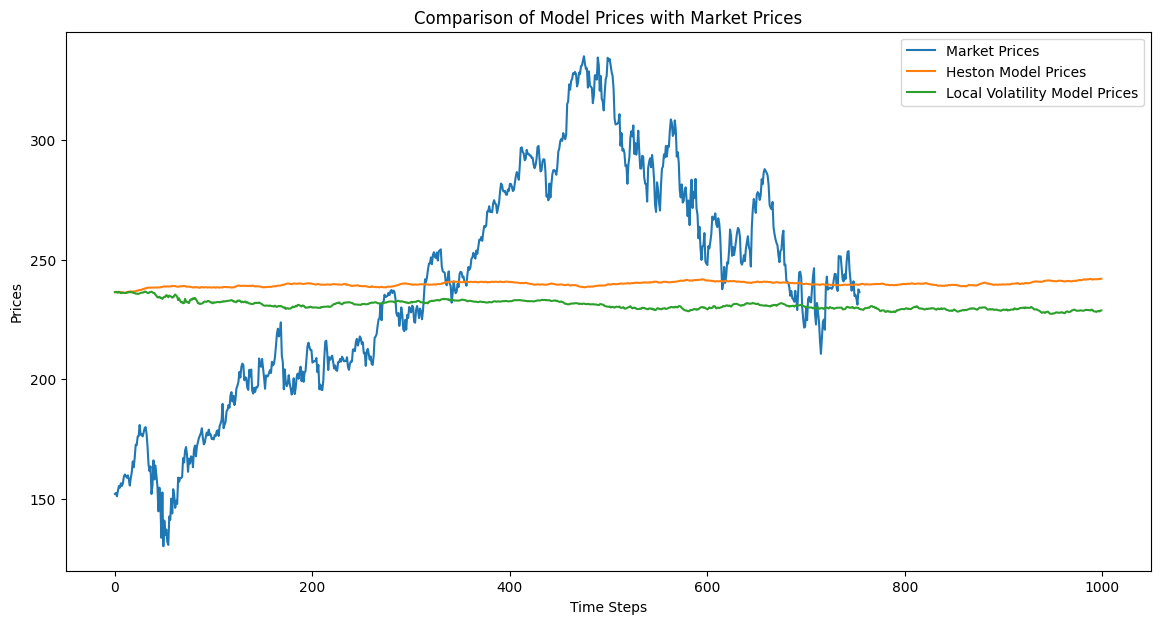

In [16]:
def compare_models(market_data, heston_prices, local_vol_prices):
    plt.figure(figsize=(14, 7))
    plt.plot(market_data['Adj Close'].values, label='Market Prices')
    plt.plot(heston_prices, label='Heston Model Prices')
    plt.plot(local_vol_prices, label='Local Volatility Model Prices')
    plt.legend()
    plt.title('Comparison of Model Prices with Market Prices')
    plt.xlabel('Time Steps')
    plt.ylabel('Prices')
    plt.show()

# Simulate Heston model prices using calibrated parameters
heston_prices_amzn = simulate_heston(S0_amzn, T, r, *calibrated_params_heston_amzn)
heston_prices_msft = simulate_heston(S0_msft, T, r, *calibrated_params_heston_msft)

# Simulate Local Volatility model prices
local_vol_prices_amzn = simulate_local_vol(S0_amzn, T, r, local_vol_surface_amzn)
local_vol_prices_msft = simulate_local_vol(S0_msft, T, r, local_vol_surface_msft)

# Compare models for Amazon
compare_models(data_amzn, heston_prices_amzn.mean(axis=0), local_vol_prices_amzn.mean(axis=0))

# Compare models for Microsoft
compare_models(data_msft, heston_prices_msft.mean(axis=0), local_vol_prices_msft.mean(axis=0))


In [17]:
returns = pd.DataFrame({
    'AMZN': data_amzn['Log Returns'],
    'MSFT': data_msft['Log Returns']
}).dropna()

cov_matrix = returns.cov()
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
           AMZN      MSFT
AMZN  0.000607  0.000380
MSFT  0.000380  0.000481


In [18]:
def risk_contribution(weights, cov_matrix):
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    marginal_contrib = np.dot(cov_matrix, weights)
    risk_contrib = weights * marginal_contrib / portfolio_var
    return risk_contrib

initial_weights = np.array([0.5, 0.5])
risk_contrib = risk_contribution(initial_weights, cov_matrix)
print("Initial Risk Contributions:\n", risk_contrib)


Initial Risk Contributions:
 [0.534138 0.465862]


In [19]:
def risk_parity_objective(weights, cov_matrix):
    risk_contrib = risk_contribution(weights, cov_matrix)
    return np.sum((risk_contrib - 1/len(weights))**2)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1) for _ in range(len(initial_weights))]
result = minimize(risk_parity_objective, initial_weights, args=(cov_matrix,), bounds=bounds, constraints=constraints)
optimized_weights = result.x
print("Optimized Weights for Risk Parity:\n", optimized_weights)


Optimized Weights for Risk Parity:
 [0.47114222 0.52885778]


In [20]:
portfolio_returns = returns.dot(optimized_weights)
cumulative_returns = (1 + portfolio_returns).cumprod()
print("Cumulative Returns:\n", cumulative_returns)


Cumulative Returns:
 Date
2020-01-03 00:00:00+00:00    0.987619
2020-01-06 00:00:00+00:00    0.995843
2020-01-07 00:00:00+00:00    0.991999
2020-01-08 00:00:00+00:00    0.996626
2020-01-09 00:00:00+00:00    1.005418
                               ...   
2022-12-23 00:00:00+00:00    1.001081
2022-12-27 00:00:00+00:00    0.984753
2022-12-28 00:00:00+00:00    0.972518
2022-12-29 00:00:00+00:00    0.999565
2022-12-30 00:00:00+00:00    0.995940
Length: 755, dtype: float64


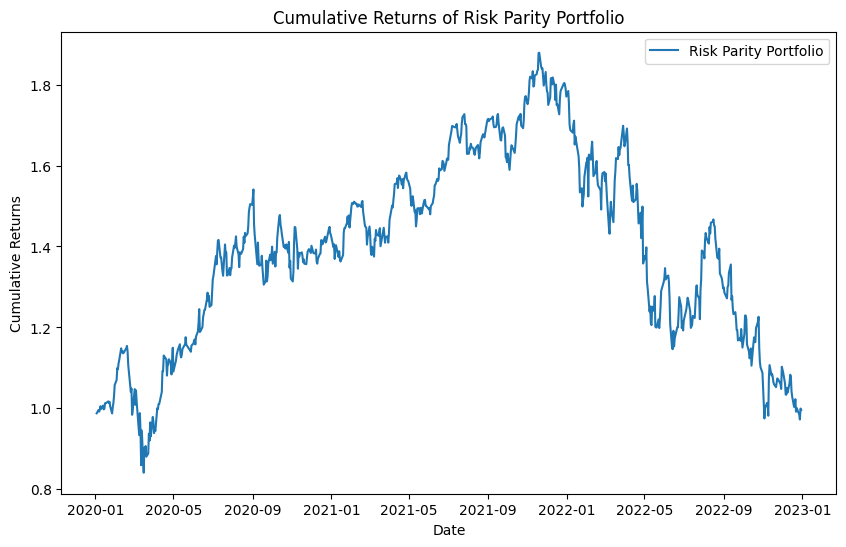

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Risk Parity Portfolio')
plt.title('Cumulative Returns of Risk Parity Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


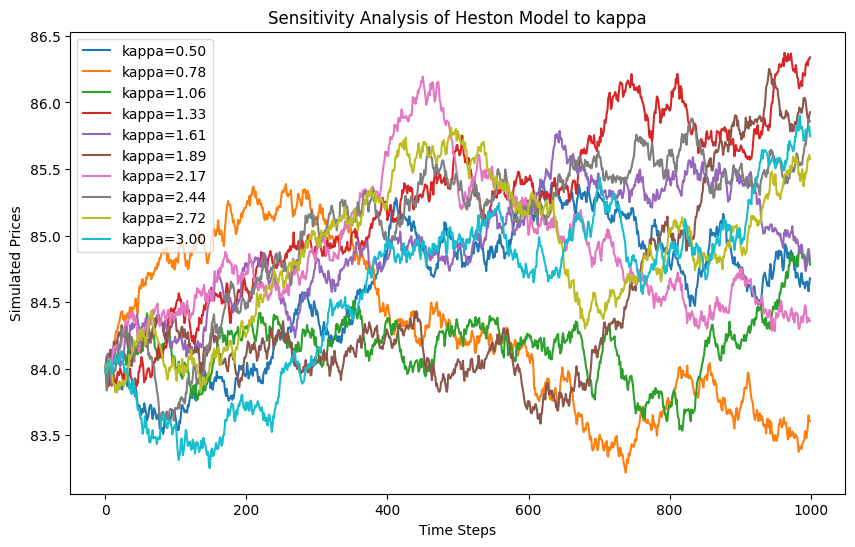

In [22]:
def sensitivity_analysis(param_name, param_values, S0, T, r, kappa, theta, sigma, rho, v0):
    results = []
    for value in param_values:
        params = {'kappa': kappa, 'theta': theta, 'sigma': sigma, 'rho': rho, 'v0': v0}
        params[param_name] = value
        simulated_prices = simulate_heston(S0, T, r, params['kappa'], params['theta'], params['sigma'], params['rho'], params['v0'])
        results.append(simulated_prices.mean(axis=0))
    return results

param_values = np.linspace(0.5, 3.0, 10)
sensitivity_results = sensitivity_analysis('kappa', param_values, S0_amzn, T, r, kappa, theta, sigma, rho, v0)

plt.figure(figsize=(10, 6))
for i, result in enumerate(sensitivity_results):
    plt.plot(result, label=f'kappa={param_values[i]:.2f}')
plt.title('Sensitivity Analysis of Heston Model to kappa')
plt.xlabel('Time Steps')
plt.ylabel('Simulated Prices')
plt.legend()
plt.show()
